# Load data

In [118]:
import pandas as pd
import numpy as np
from utils.currency_dataframe import CurrencyDataframe
from utils.oil_dataframe import OilDataFrame
from utils.ptax_dataframe import PTaxlDataFrame
from utils.boi_dataframe import BoiDataFrame
from utils.soja_dataframe import SojaDataFrame

from importlib import reload 

import matplotlib.pyplot as plt

csvFile = r'..\data\global_inflation_data.csv'
currencyDf = CurrencyDataframe(csvFile).get_dataframe()

csvFile = r'..\data\historico_ptax.csv'
ptaxDf = PTaxlDataFrame(csvFile).get_dataframe()

csvFile = r'..\data\crude-oil-prices.csv'
oilDf = OilDataFrame(csvFile).get_dataframe()

xlsFile = r'..\data\cepea-consulta-boi.xls'
boiDf = BoiDataFrame(xlsFile).get_dataframe()

xlsFile = r'..\data\cepea-consulta-soja.xls'
sojaDf = SojaDataFrame(xlsFile).get_dataframe()


# Model based on cumulative inflation

## Brazil dataframe

### Creating dataframe

In [37]:
dfBrazil = currencyDf[currencyDf['country_name'] == 'Brazil']

In [71]:
dfBrazil.head()
ptaxDf.head()
oilDf.head()
boiDf.head()
sojaDf.head()

,ano,valor
0,2006,"30,08"
1,2007,"36,60"
2,2008,"48,39"
3,2009,"48,09"
4,2010,"42,08"


Merge of dataframes

In [119]:
df = dfBrazil.merge(ptaxDf, left_on='Year', right_on='ano')
df.drop('ano', axis=1, inplace=True)
df = df.merge(oilDf, left_on='Year', right_on='ano')
df.drop('ano', axis=1, inplace=True)
df = df.merge(sojaDf, left_on='Year', right_on='ano')
df.drop('ano', axis=1, inplace=True)
df = df.merge(boiDf, left_on='Year', right_on='ano')
df.drop('ano', axis=1, inplace=True)

### Data visualization

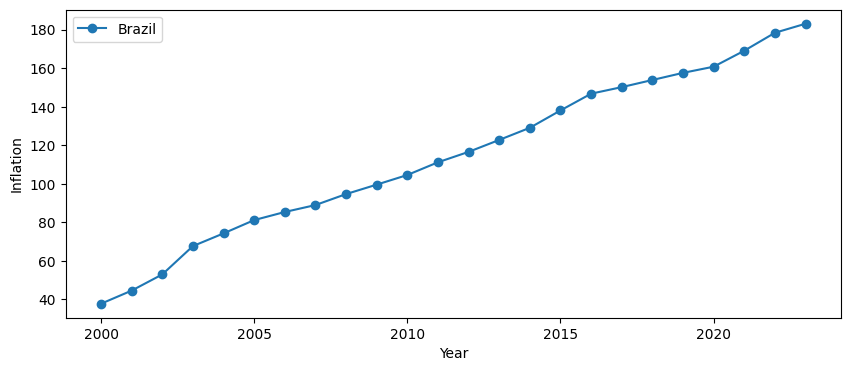

In [120]:
fig, ax = plt.subplots(figsize=(10,4))
plt.plot(df['Year'], df['cumulative_inflation'], label='Brazil', marker='o')
plt.xlabel('Year')
plt.ylabel('Inflation')
plt.legend(loc='upper left')
plt.show()

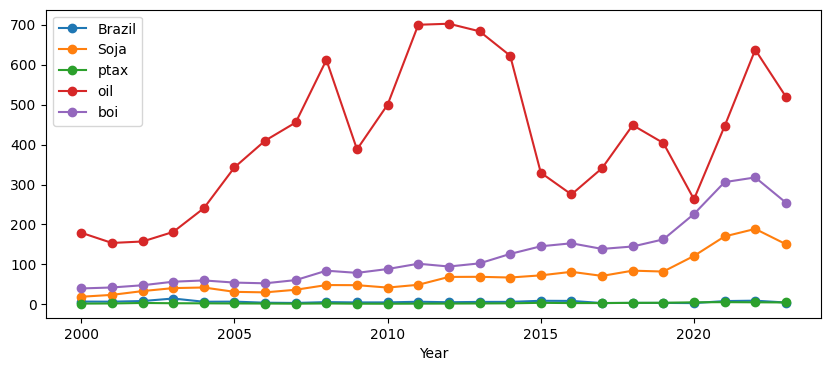

In [123]:
fig, ax = plt.subplots(figsize=(10,4))
plt.plot(df['Year'], df['Inflation'], label='Brazil', marker='o')
plt.plot(df['Year'], df['soja'], label='Soja', marker='o')
plt.plot(df['Year'], df['ptax'], label='ptax', marker='o')
plt.plot(df['Year'], df['oil'], label='oil', marker='o')
plt.plot(df['Year'], df['boi'], label='boi', marker='o')
plt.xlabel('Year')
plt.legend(loc='upper left')
plt.show()


### Linear Regression Model

In [124]:
type(df['Year'].to_frame())

pandas.core.frame.DataFrame

In [130]:
from sklearn.model_selection import train_test_split
df.drop(columns = ['country_name', 'Currency'], inplace=True)
X = df.drop(columns = 'Inflation')
Y = df['Inflation']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=23)
print(f'Exemplos para o treinamento: {len(y_train)}. E para o teste: {len(y_test)}')

Exemplos para o treinamento: 16. E para o teste: 8


In [131]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

ValueError: could not convert string to float: 'Brazil'

In [127]:
# mse = mean_squared_error(y_test,y_pred, squared=True)  || Deprecated
mae = mean_absolute_error(y_test,y_pred)
mse = root_mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test,y_pred)

print(f'MAE: {mae} - MSE: {mse} - RMSE: {rmse} - MAPE: {mape}')

MAE: 3.5934497913521204 - MSE: 4.402187786136311 - RMSE: 2.098139124590243 - MAPE: 0.04853429051682481


#### Output model

In [128]:
import joblib

joblib.dump(model, './output/modelLinearBrazil.pkl')

['./output/modelLinearBrazil.pkl']

# Running Streamlit

streamlit run streamlit/app.py